In [1]:
# Import the module
import arcadia_pycolor as apc

In [2]:
# Direct access to a specific color.
# __repr__ method allows for display of the color in the terminal.
apc.aegean

   aegean #5088C5

In [3]:
# Displaying a Palette.
apc.palettes.accent

   aegean  #5088C5
   amber   #F28360
   seaweed #3B9886
   canary  #F7B846
   aster   #7A77AB
   rose    #F898AE

In [4]:
# Displaying a Gradient.
apc.gradients.viridis

                     
   concord #341E60 0
   grape   #5A4596 0.23
   aegean  #5088C5 0.49
   lime    #97CD78 0.77
   yellow  #FFFF00 1

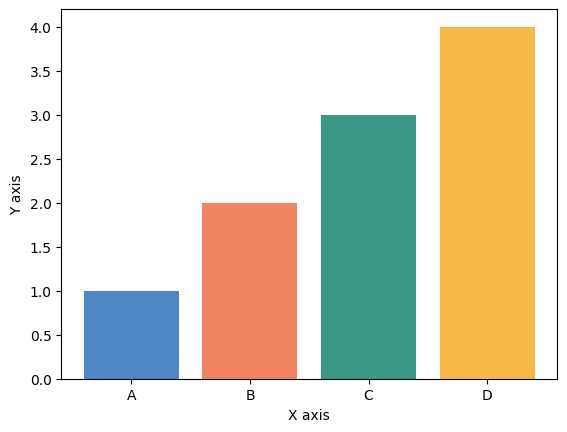

In [5]:
# Using colors in a matplotlib plot.
import matplotlib.pyplot as plt

plt.bar(
    x=["A", "B", "C", "D"],
    height=[1, 2, 3, 4],
    color=[apc.aegean, apc.amber, apc.seaweed, apc.canary],
)
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.show()

In [6]:
# Creating a Palette from a list of colors.
my_palette = apc.Palette("my_palette", [apc.aegean, apc.amber, apc.seaweed, apc.canary])

my_palette

   aegean  #5088C5
   amber   #F28360
   seaweed #3B9886
   canary  #F7B846

In [7]:
# Creating a Palette from a dictionary.
my_palette = apc.Palette.from_dict(
    "my_palette",
    {
        "red": "#FF0000",
        "green": "#00FF00",
        "blue": "#0000FF",
    },
)

my_palette

   red   #FF0000
   green #00FF00
   blue  #0000FF

In [8]:
# Creating a Gradient from a list of colors.
my_gradient = apc.Gradient("my_gradient", [apc.vitalblue, apc.oat, apc.amber])

my_gradient

                     
   vitalblue #73B5E3 0.0
   oat       #F5E4BE 0.5
   amber     #F28360 1.0

In [9]:
# Creating a Gradient from a list of colors while specifying values.
my_gradient = apc.Gradient(
    "my_gradient",
    [apc.concord, apc.vitalblue, apc.oat, apc.amber, apc.carmine],
    [0, 0.35, 0.5, 0.65, 1],
)

my_gradient

                     
   concord   #341E60 0
   vitalblue #73B5E3 0.35
   oat       #F5E4BE 0.5
   amber     #F28360 0.65
   carmine   #471122 1

In [10]:
# Creating a Gradient from a dictionary of colors.
my_gradient = apc.Gradient.from_dict(
    "my_gradient",
    {
        "red": "#FF0000",
        "grey": "#DDDDDD",
        "blue": "#0000FF",
    },
)

my_gradient

                     
   red  #FF0000 0.0
   grey #DDDDDD 0.5
   blue #0000FF 1.0

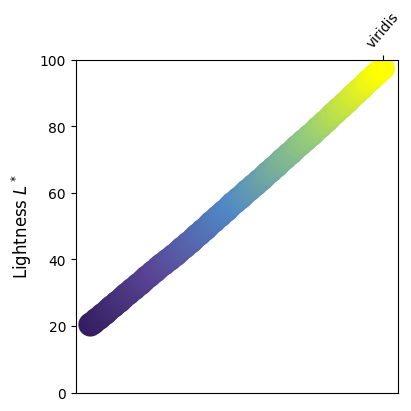

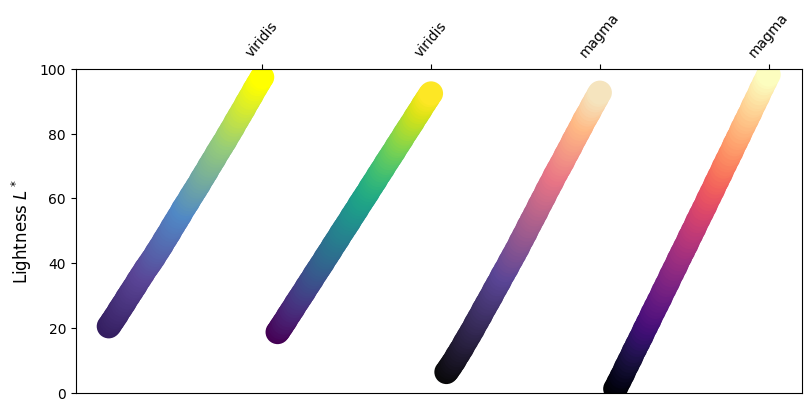

In [11]:
# Display the lightness of a Gradient.
apc.plot.plot_gradient_lightness(apc.gradients.viridis)
apc.plot.plot_gradient_lightness(
    [apc.gradients.viridis, "viridis", apc.gradients.magma, "magma"],
    figsize=(8, 4),
)

## Before `apc.mpl.setup()`

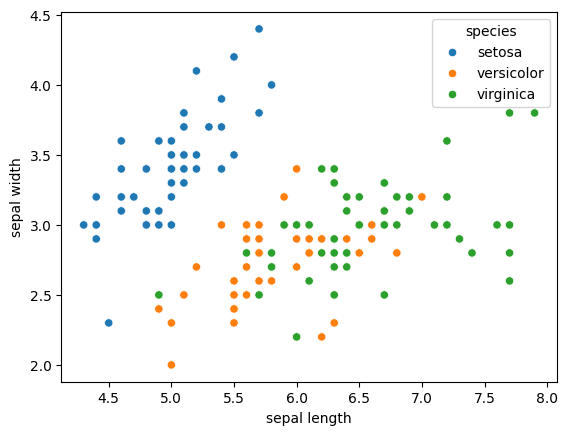

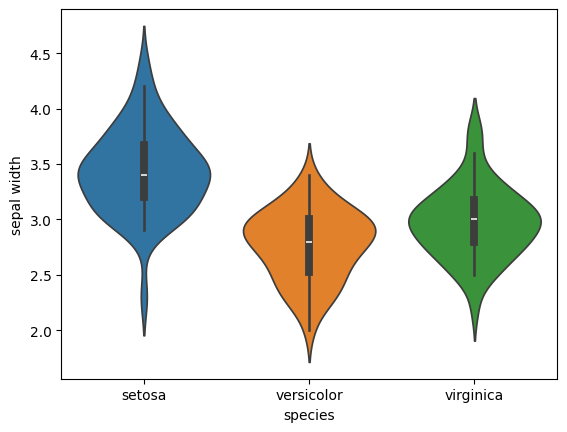

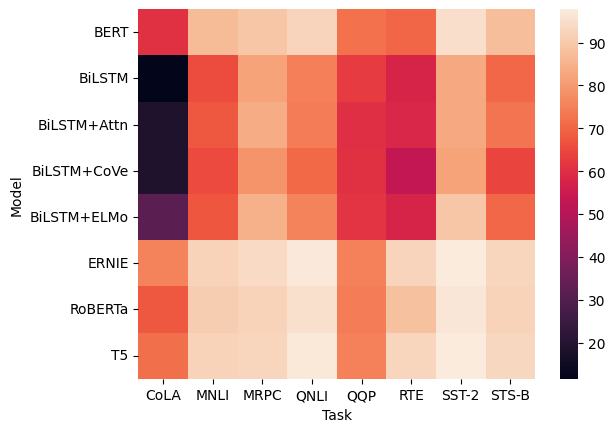

In [12]:
import pandas as pd
import seaborn as sns
from sklearn import datasets

# prepare dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = [i.replace(" (cm)", "") for i in iris.feature_names]
iris_data["species"] = iris.target_names[iris.target]
iris_data.head(5)

# plot
x_data = "sepal length"
y_data = "sepal width"
c_data = "species"

sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data)
plt.show()

sns.violinplot(x=c_data, y=y_data, data=iris_data, hue=c_data)
plt.show()

glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
sns.heatmap(glue)
plt.show()

## After `apc.mpl.setup()`
- Updates `plt.rcParams` for all downstream plots
- Sets display background to off-white
- Updates fonts to use `Suisse Int'l` if they're available on your machine
- Adjusts padding, line width, and other elements
- Removes top and right spines

FileNotFoundError: [Errno 2] No such file or directory: 'examples/scatter_setup.pdf'

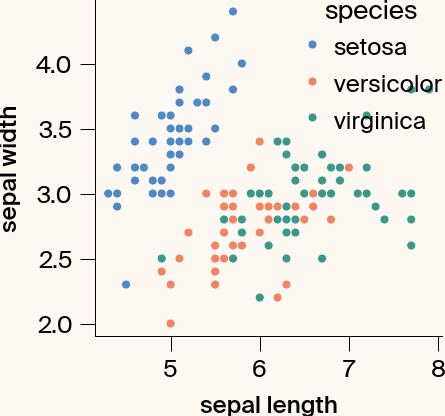

In [13]:
apc.mpl.setup()

colors = {
    "setosa": "apc:aegean",
    "versicolor": apc.amber,
    "virginica": apc.seaweed,
}

fig, ax = plt.subplots(figsize=apc.mpl.dimensions("threeq_s"), layout="constrained")
sns.scatterplot(
    x=x_data,
    y=y_data,
    hue=c_data,
    data=iris_data,
    palette=colors,
    ax=ax,
    s=80,
)
plt.savefig("examples/scatter_setup.pdf", **apc.mpl.SAVE_WEB)  # Adds correct padding around plot.
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.dimensions("threeq_s"), layout="constrained")
sns.violinplot(
    x=c_data,
    y=y_data,
    data=iris_data,
    hue=c_data,
    palette=colors,
    ax=ax,
)
plt.savefig("examples/violin_setup.pdf", **apc.mpl.SAVE_WEB)  # Adds correct padding around plot.
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.dimensions("threeq_w"), layout="constrained")
sns.heatmap(glue, ax=ax, cmap="apc:reds")
plt.savefig("examples/heatmap_setup.pdf", **apc.mpl.SAVE_WEB)  # Adds correct padding around plot.
plt.show()

## With `apc.mpl.autostyle()`
- Automatically capitalizes legend, axis titles
- Adds a horizontal line between legend title and entries
- Use `mono` argument to set font to monospace for a given axis
- Use `cat` argument to set axis to categorical, which capitalizes text, removes tickmarks, and adjusts padding
- Use `cbar` argument if a colorbar is present to monospace the ticks

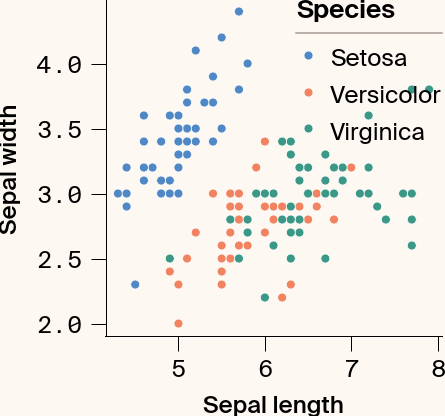

/Users/dennis/Code/arcadia-pycolor/arcadia_pycolor/mpl.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


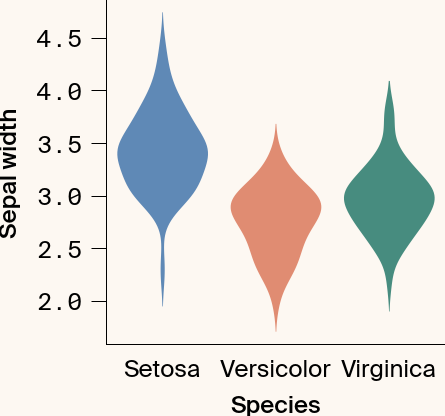

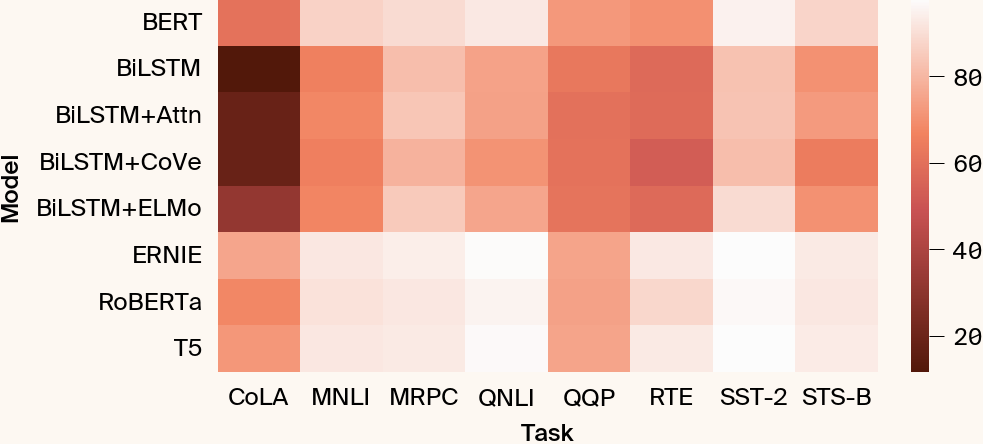

In [ ]:
fig, ax = plt.subplots(figsize=apc.mpl.dimensions("threeq_s"), layout="constrained")
sns.scatterplot(
    x=x_data,
    y=y_data,
    hue="species",
    data=iris_data,
    palette=colors,
    ax=ax,
    s=80,
)
apc.mpl.autostyle(mono="both")

plt.savefig(
    "examples/scatter_autostyle.pdf", **apc.mpl.SAVE_WEB
)  # Adds correct padding around plot.

plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.dimensions("threeq_s"), layout="constrained")
sns.violinplot(
    x=c_data,
    y=y_data,
    data=iris_data,
    hue=c_data,
    palette=colors,
    ax=ax,
)
apc.mpl.autostyle(cat="x", mono="y")
plt.savefig(
    "examples/violin_autostyle.pdf", **apc.mpl.SAVE_WEB
)  # Adds correct padding around plot.

plt.show()


fig, ax = plt.subplots(figsize=apc.mpl.dimensions("threeq_w"), layout="constrained")
sns.heatmap(glue, ax=ax, cmap="apc:reds")
apc.mpl.autostyle(cbar=True)  # Didn't use cat = "both" because it alters the ALLCAPS axis labels.
apc.mpl.categorical_xaxis()
apc.mpl.categorical_yaxis()

plt.savefig(
    "examples/heatmap_autostyle.pdf", **apc.mpl.SAVE_WEB
)  # Adds correct padding around plot.
plt.show()

## Granular breakdown of the `apc.mpl` module

In [ ]:
# Accepts "fonts", "colors", "gradients", "palettes", "styles", or "all".
# TODO: Shouldn't cause errors when rerun.
apc.mpl.setup()

# Depending on selection, calls one of the following private methods:

# Loads the fonts into matplotlib by detecting the available Suisse fonts.
# Users will need to install the Suisse fonts to use them.
# This currently only supports macOS.
# apc.mpl._load_fonts()

# Adds Arcadia's colors to the matplotlib color library with prefix "apc:"
# apc.mpl._load_colors()

# Adds Arcadia's gradients to the matplotlib color library with prefix "apc:"
# apc.mpl._load_gradients()

# Adds Arcadia's palettes to the matplotlib color library with prefix "apc:"
# apc.mpl._load_palettes()

# Updates matplotlib rcContext with Arcadia's styles.
# apc.mpl._load_styles()

## Declarative utilities of `apc.mpl`
These are wrappers for `matplotlib` functions that:
1) Have a "declarative" API similar to `matplotlib`'s `set_xlabel`, `set_xticks`, etc.
1) Detect the current axis using `plt.gca()`, if one is not provided
2) Use `matplotlib`-native functions to achieve the desired effect

/Users/dennis/Code/arcadia-pycolor/arcadia_pycolor/mpl.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/dennis/Code/arcadia-pycolor/arcadia_pycolor/mpl.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


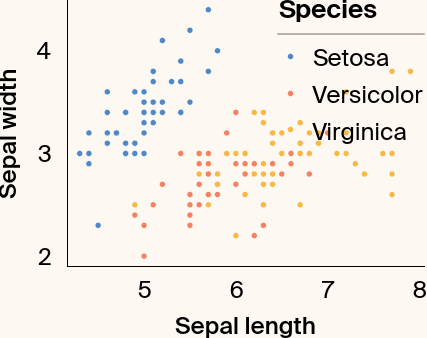

In [ ]:
sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data)


# Capitalize the axis labels.
apc.mpl.capitalize_xlabel()
apc.mpl.capitalize_ylabel()

# Do both with:
apc.mpl.capitalize_axislabels()


# Capitalize axis tick labels.
apc.mpl.capitalize_xticklabels()
apc.mpl.capitalize_yticklabels()

# Do both with:
apc.mpl.capitalize_ticklabels()


leg = plt.gca().get_legend()

# Capitalize legend title.
apc.mpl.capitalize_legend_title(legend=leg)

# Capitalize legend entry names.
apc.mpl.capitalize_legend_entries(legend=leg)

# Capitalize all legend text.
apc.mpl.capitalize_legend(legend=leg)

# Add horizontal line between legend title and entries.
# apc.mpl.add_legend_line(legend = leg)

# Left-justify legend entries and set title to Suisse Int'l Semibold.
apc.mpl.justify_legend(legend=leg)

# Do all with:
apc.mpl.style_legend(legend=leg)


# Change the font of the axis labels to monospace (for numerical axes).
apc.mpl.monospace_xticklabels()
apc.mpl.monospace_yticklabels()

# Do both with:
apc.mpl.monospace_ticklabels()


# Remove ticks and adjust padding for categorical axes.
apc.mpl.categorical_xaxis()
apc.mpl.categorical_yaxis()

# Do both with:
apc.mpl.categorical_axes()


# If there's a colorbar, monospace the tick labels.
apc.mpl.monospace_colorbar()

## Sizing styles

The `apc.mpl.dimensions()` function allows you to choose from a fixed set of plot sizes, which match existing Illustrator templates.

When generated with `layout="constrained"` and saved using `apc.mpl.SAVE_WEB` parameters, the resulting PDF images should drag and drop perfectly into place with the Illustrator templates.

There are three size categories, based on the Illustrator templates:
- `"full"` (1500px wide)
- `"threeq"`, or three-quarters (1050px wide)
- `"half"`, or half-page (750px wide)

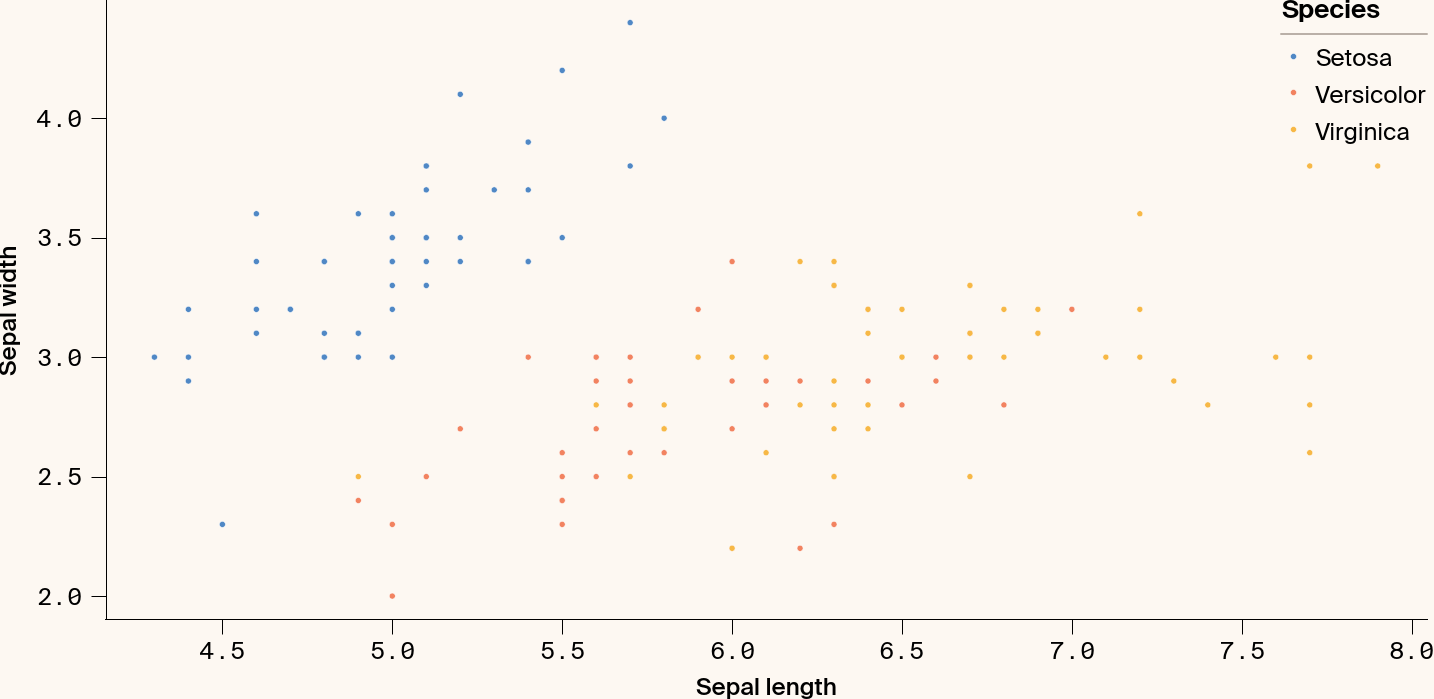

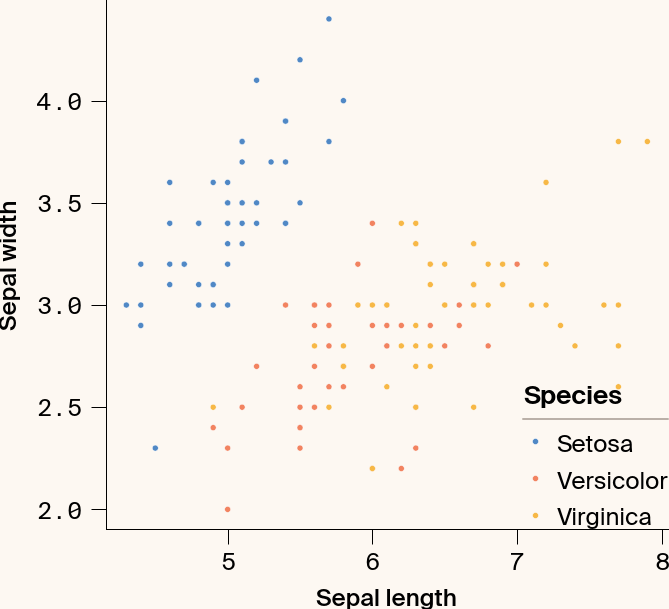

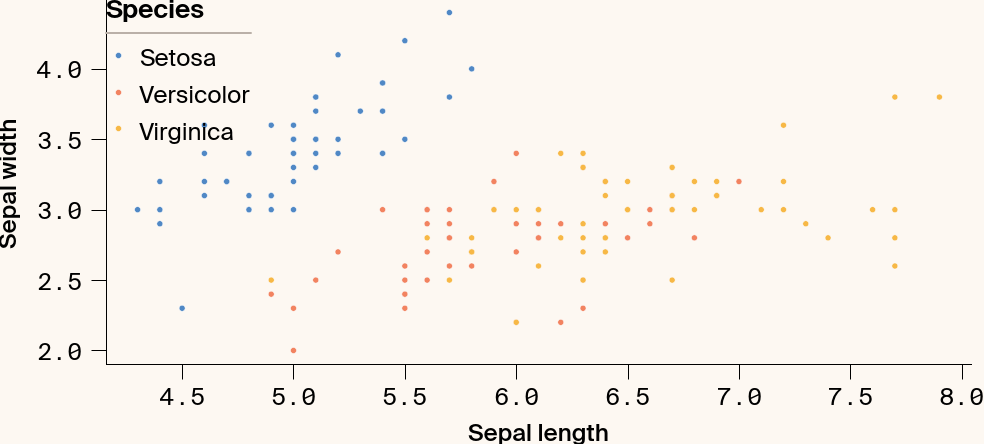

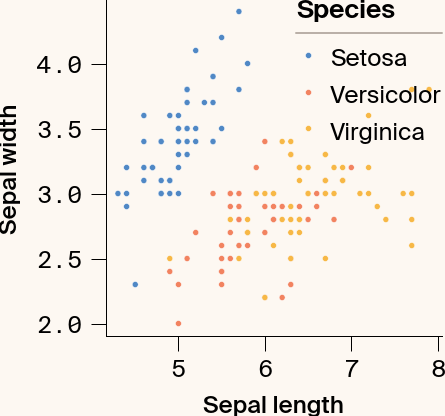

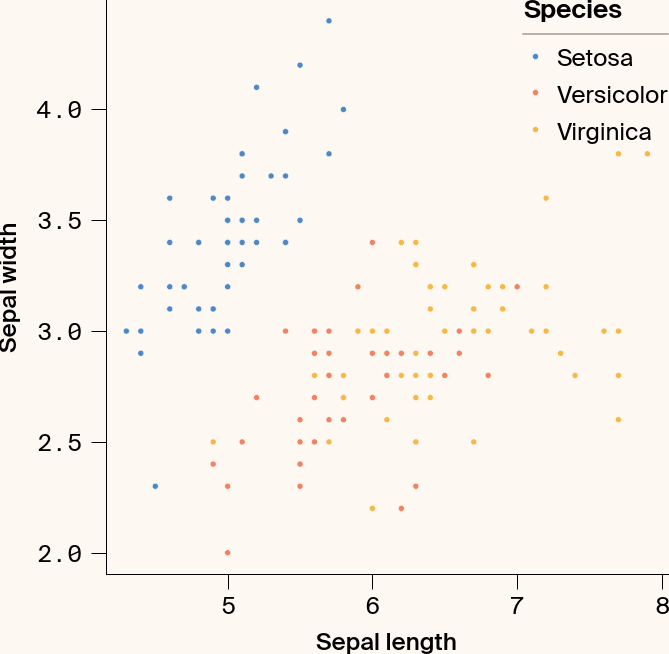

In [ ]:
fig, ax = plt.subplots(figsize=apc.mpl.dimensions("full_w"), layout="constrained")
sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, ax=ax)
apc.mpl.autostyle(mono="both")
plt.savefig("examples/scatter_full_wide.pdf", **apc.mpl.SAVE_WEB)
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.dimensions("full_s"), layout="constrained")
sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, ax=ax)
apc.mpl.autostyle(mono="both")
plt.savefig("examples/scatter_full_small.pdf", **apc.mpl.SAVE_WEB)
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.dimensions("threeq_w"), layout="constrained")
sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, ax=ax)
apc.mpl.autostyle(mono="both")
plt.savefig("examples/scatter_threeq_wide.pdf", **apc.mpl.SAVE_WEB)
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.dimensions("threeq_s"), layout="constrained")
sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, ax=ax)
apc.mpl.autostyle(mono="both")
plt.savefig("examples/scatter_threeq_small.pdf", **apc.mpl.SAVE_WEB)
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.dimensions("half_s"), layout="constrained")
sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, ax=ax)
apc.mpl.autostyle(mono="both")
plt.savefig("examples/scatter_half_small.pdf", **apc.mpl.SAVE_WEB)
plt.show()